In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
pd.options.display.max_rows = 999
pd.options.display.max_columns = 90

# import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Load the data (sql db)

In [2]:
df_raw = pd.read_csv('../data/01_raw/bmarket.csv')

# 1. Data Understanding and Insights

In [3]:
# Insights from running .info()
# 'Housing Loan' and 'Personal Loan' has null values

df_raw.info() # df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [4]:
# Check if there are any duplicated client ID

duplicated = df_raw['Client ID'].duplicated().any()
print(duplicated)

False


In [5]:
# Observation from 'Age'
df_raw['Age'].value_counts()

Age
150 years    4197
31 years     1747
32 years     1646
33 years     1643
36 years     1606
35 years     1584
34 years     1577
30 years     1536
37 years     1345
29 years     1310
38 years     1283
39 years     1281
41 years     1142
40 years     1027
42 years     1020
45 years      979
43 years      950
46 years      920
44 years      892
28 years      892
48 years      875
47 years      833
50 years      778
27 years      765
49 years      758
52 years      689
51 years      676
53 years      654
56 years      636
26 years      630
54 years      628
57 years      597
55 years      589
25 years      536
58 years      511
24 years      414
59 years      409
60 years      254
23 years      207
22 years      123
21 years       90
61 years       66
20 years       62
62 years       55
64 years       55
66 years       54
63 years       50
71 years       47
65 years       42
70 years       40
19 years       38
73 years       33
69 years       32
68 years       31
76 years       30
74 yea

In [6]:
# Observation from 'Occupation'
df_raw['Occupation'].value_counts()

Occupation
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [7]:
# Observations from 'Marital Status'
df_raw['Marital Status'].value_counts()

Marital Status
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [8]:
# Observation from 'Education Level'
df_raw['Education Level'].value_counts()

Education Level
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [9]:
# Observation from 'Credit Default'
df_raw['Credit Default'].value_counts()

Credit Default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [10]:
# Observation from 'Housing Loan'
df_raw['Housing Loan'].value_counts()

Housing Loan
yes        8595
no         7411
unknown     393
Name: count, dtype: int64

In [11]:
# Observation from 'Personal Loan'
df_raw['Personal Loan'].value_counts()

Personal Loan
no         30532
yes         5633
unknown      877
Name: count, dtype: int64

In [12]:
# Observation from 'Contact Method'
# Repeat in contact method
df_raw['Contact Method'].value_counts()

Contact Method
Cell         13100
cellular     13044
Telephone     7585
telephone     7459
Name: count, dtype: int64

In [13]:
# Observation from 'Campaign Calls'
# There are negative values
df_raw['Campaign Calls'].value_counts()

Campaign Calls
 1     15874
 2      9446
 3      4807
 4      2405
-1      1768
 5      1451
-2      1124
 6       893
 7       566
-3       534
 8       365
 9       253
-4       246
 10      206
 11      156
-5       148
 12      107
-6        86
 13       84
-7        63
 14       58
 17       51
 15       47
 16       46
-8        35
-9        30
 18       30
 20       27
 19       24
 21       22
-11       21
-10       19
-12       18
 24       15
 22       14
 27       11
-14       11
 23       11
 29        9
-13        8
 26        8
 30        7
 31        7
-17        7
 25        7
 28        6
-23        5
-16        5
-15        4
 33        4
 34        3
 32        3
-18        3
-22        3
-20        3
 35        3
 42        2
-28        2
 43        2
 40        2
-21        2
-35        2
-19        2
-29        1
-32        1
 56        1
-41        1
 39        1
 37        1
-25        1
Name: count, dtype: int64

In [14]:
# Observation from 'Previous Contact Days'
df_raw['Previous Contact Days'].value_counts()

Previous Contact Days
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
27         1
20         1
25         1
Name: count, dtype: int64

In [15]:
# Observation from 'Subscription Status'
# The number of non-subscription is almost 8 times more than subscriptions
df_raw['Subscription Status'].value_counts()

Subscription Status
no     36548
yes     4640
Name: count, dtype: int64

# 2. Data Cleaning

Since there are no duplicated Client IDs, we will not be removing any rows from the DB.

After that, we will confirm that the DB has no remaining null values by using '.isna().any()' <br>
'.isna' is used to identify missing data in a database. <br>
'.any()' would return one value for each column. *TRUE* if any value in that column is *TRUE*, and *FALSE* if otherwise.  <br>
Then, we do a check to ensure the number of values match for all the columns.

In [16]:
df_cleaned = df_raw.copy

df_cleaned = df_raw.fillna({
    'Housing Loan': 'unknown',
    'Personal Loan': 'unknown'
})

display(df_cleaned.isna().any())
print('\n')
display(df_cleaned.info())

Client ID                False
Age                      False
Occupation               False
Marital Status           False
Education Level          False
Credit Default           False
Housing Loan             False
Personal Loan            False
Contact Method           False
Campaign Calls           False
Previous Contact Days    False
Subscription Status      False
dtype: bool



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           41188 non-null  object
 7   Personal Loan          41188 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


None

In 'Contact Method', some values appear different but have the same meaning. <br>
1. 'Cell' / 'cellular' <br>
2. 'Telephone' / 'telephone'<br>
Therefore, we will change first value to match the second value using '.replace()' <br>
df['<Column_Name>'] = f['<Column_Name>'].replace('First_value', 'Second value') <br>
With this, any cells with the first value 'Cell' will be replaced with 'cellular'.

In [17]:
df_cleaned['Contact Method'] = df_cleaned['Contact Method'].replace('Cell', 'cellular')
df_cleaned['Contact Method'] = df_cleaned['Contact Method'].replace('Telephone', 'telephone')

df_cleaned['Contact Method'].value_counts()

Contact Method
cellular     26144
telephone    15044
Name: count, dtype: int64

There is a large percentage of users that are '150 years' old. <br>
Therefore, we have decided to remove the data entries as they are unrealistic for humans and would misled the analysis and confuse the model. <br>
This helps the data be more reliable and meaningful.

In [18]:
df_cleaned['Age'] = (
    df_cleaned['Age']
    .astype(str)
    .str.replace(' years', '')
    .astype(int)
)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['Age'] == 150].index)

df_cleaned['Age'].value_counts()

Age
31    1747
32    1646
33    1643
36    1606
35    1584
34    1577
30    1536
37    1345
29    1310
38    1283
39    1281
41    1142
40    1027
42    1020
45     979
43     950
46     920
44     892
28     892
48     875
47     833
50     778
27     765
49     758
52     689
51     676
53     654
56     636
26     630
54     628
57     597
55     589
25     536
58     511
24     414
59     409
60     254
23     207
22     123
21      90
61      66
20      62
62      55
64      55
66      54
63      50
71      47
65      42
70      40
19      38
73      33
69      32
68      31
76      30
74      30
72      30
80      29
18      27
78      23
67      21
75      20
88      19
77      18
81      16
83      16
82      16
85      15
79      13
86       8
84       7
17       5
92       4
89       2
91       2
98       2
95       1
Name: count, dtype: int64

Some entries in 'Campaign Calls' appeared as negative numbers. However, the number of calls made to a client cannot be negative in real life. This mistake is almost certainly caused by a data entry mistake or a formatting issue.

As the actual value should logically be the positive number, we corrected these entries by removing the negative sign.

In [19]:
df_cleaned['Campaign Calls'] = df_cleaned['Campaign Calls'].astype(str)
df_cleaned['Campaign Calls'] = df_cleaned['Campaign Calls'].str.replace('-','')
df_cleaned['Campaign Calls'] = df_cleaned['Campaign Calls'].astype(int)

df_cleaned['Campaign Calls'].value_counts()


Campaign Calls
1     15799
2      9532
3      4779
4      2404
5      1426
6       878
7       567
8       361
9       255
10      201
11      159
12      116
13       84
14       61
17       52
16       48
15       43
18       31
20       29
19       23
21       22
23       16
22       15
24       13
29       10
27       10
25        8
26        8
28        7
30        6
31        6
33        4
35        4
32        3
43        2
40        2
34        2
42        1
56        1
41        1
39        1
37        1
Name: count, dtype: int64

In [20]:
df_cleaned['WasContactedBefore'] = (df_cleaned['Previous Contact Days'] != 999).astype(int)
df_cleaned['PreviouslyContacted'] = df_cleaned['Previous Contact Days'].replace({999: 0})

In [21]:
bins = [1, 25, 35, 45, 55, 65, 120]
labels = ['1–25', '26–35', '36–45', '46–55', '56–65', '66+']

# create age_group in df_filled
df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'],
                                 bins=bins,
                                 labels=labels,
                                 right=False)


In [22]:
# data cleaning done, display overview
df_cleaned.to_csv("df_cleaned.csv", index=False)
df_cleaned.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status,WasContactedBefore,PreviouslyContacted,Age Group
0,32885,57,technician,married,high.school,no,no,yes,cellular,1,999,no,0,0,56–65
1,3170,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no,0,0,56–65
2,32207,33,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no,0,0,26–35
3,9404,36,admin.,married,high.school,no,no,no,telephone,4,999,no,0,0,36–45
4,14021,27,housemaid,married,high.school,no,unknown,no,cellular,2,999,no,0,0,26–35


#Data Analysis


Financial Loans Analysis

In [23]:
# Find out the number of people with loans or with credit default
cd = df_cleaned['Credit Default'].value_counts()
pl = df_cleaned['Personal Loan'].value_counts()
hl = df_cleaned['Housing Loan'].value_counts()
sub = df_cleaned['Subscription Status'].value_counts()
print(cd)
print(pl)
print(hl)
print(sub)

Credit Default
no         29272
unknown     7716
yes            3
Name: count, dtype: int64
Personal Loan
no         27427
yes         5041
unknown     4523
Name: count, dtype: int64
Housing Loan
unknown    22659
yes         7688
no          6644
Name: count, dtype: int64
Subscription Status
no     32800
yes     4191
Name: count, dtype: int64


Areas of Analysis:
1. Percentage of people without credit default, with housing loan or personal loan and are subscribed

2. Combination of housing and personal loan with the subscription status



1. Analysis of housing loan with subscription status

Subscription Status     no   yes  Total  Subscription Rate (%)
Housing Loan                                                  
yes                   6780   908   7688              11.810614
no                    5893   751   6644              11.303432
unknown              20127  2532  22659              11.174368


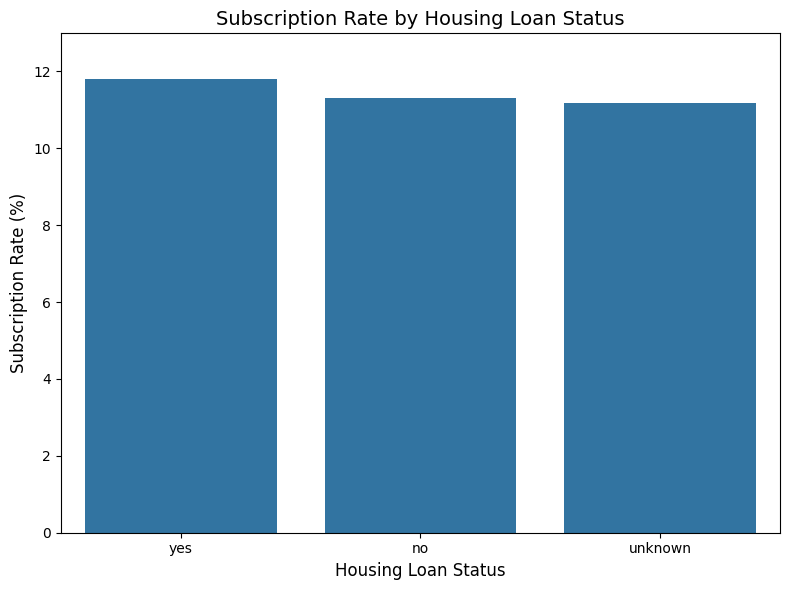

In [24]:
#Defining all financial loans
fill_cols = ['Housing Loan', 'Personal Loan', 'Credit Default']
target_col = 'Subscription Status'
feature_col_hl = 'Housing Loan'
feature_col_pl = 'Personal Loan'
feature_col_cd = 'Credit Default'

#Groups housing loan data by the status
housing_loan_analysis = df_cleaned.groupby([feature_col_hl, target_col]).size().unstack(fill_value=0)
housing_loan_analysis['Total'] = housing_loan_analysis.sum(axis=1)
#Calculation of percentage subscribed
if 'yes' in housing_loan_analysis.columns:
    housing_loan_analysis['Subscription Rate (%)'] = (housing_loan_analysis['yes'] / housing_loan_analysis['Total']) * 100
else:
    housing_loan_analysis['Subscription Rate (%)'] = 0
housing_loan_analysis = housing_loan_analysis.sort_values(by='Subscription Rate (%)', ascending=False)
print(housing_loan_analysis)

# Plotting bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=housing_loan_analysis.index, y='Subscription Rate (%)', data=housing_loan_analysis)
plt.title(f'Subscription Rate by {feature_col_hl} Status', fontsize=14)
plt.xlabel(f'{feature_col_hl} Status', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, housing_loan_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('housing_loan_subscription_rate.png')
plt.show()

2. Analysis of personal loan with subscription status

Subscription Status     no   yes  Total  Subscription Rate (%)
Personal Loan                                                 
no                   24287  3140  27427              11.448573
yes                   4487   554   5041              10.989883
unknown               4026   497   4523              10.988282


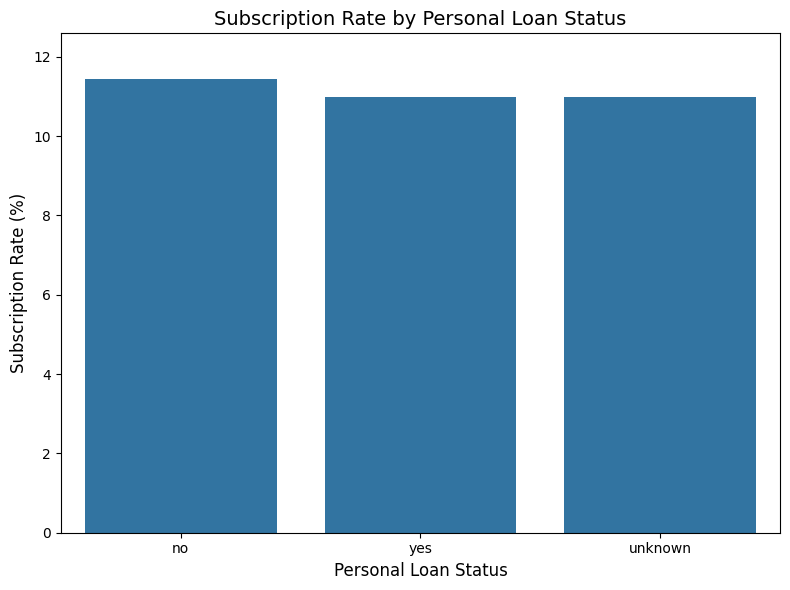

In [25]:
personal_loan_analysis = df_cleaned.groupby([feature_col_pl, target_col]).size().unstack(fill_value=0)
personal_loan_analysis['Total'] = personal_loan_analysis.sum(axis=1)
if 'yes' in personal_loan_analysis.columns:
    personal_loan_analysis['Subscription Rate (%)'] = (personal_loan_analysis['yes'] / personal_loan_analysis['Total']) * 100
else:
    personal_loan_analysis['Subscription Rate (%)'] = 0
personal_loan_analysis = personal_loan_analysis.sort_values(by='Subscription Rate (%)', ascending=False)
print(personal_loan_analysis)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=personal_loan_analysis.index, y='Subscription Rate (%)', data=personal_loan_analysis)
plt.title(f'Subscription Rate by {feature_col_pl} Status', fontsize=14)
plt.xlabel(f'{feature_col_pl} Status', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, personal_loan_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('personal_loan_subscription_rate.png')
plt.show()

3. Analysis of credit default with subscription status

Subscription Status     no   yes  Total  Subscription Rate (%)
Credit Default                                                
no                   25479  3793  29272              12.957775
unknown               7318   398   7716               5.158113
yes                      3     0      3               0.000000


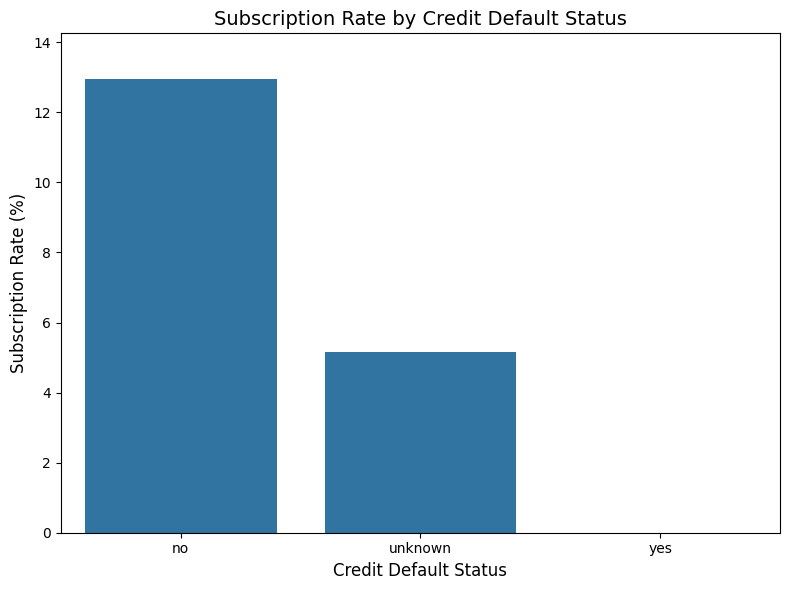

In [26]:
credit_default_analysis = df_cleaned.groupby([feature_col_cd, target_col]).size().unstack(fill_value=0)
credit_default_analysis['Total'] = credit_default_analysis.sum(axis=1)
if 'yes' in credit_default_analysis.columns:
    credit_default_analysis['Subscription Rate (%)'] = (credit_default_analysis['yes'] / credit_default_analysis['Total']) * 100
else:
    credit_default_analysis['Subscription Rate (%)'] = 0
credit_default_analysis = credit_default_analysis.sort_values(by='Subscription Rate (%)', ascending=False)
print(credit_default_analysis)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=credit_default_analysis.index, y='Subscription Rate (%)', data=credit_default_analysis)
plt.title(f'Subscription Rate by {feature_col_cd} Status', fontsize=14)
plt.xlabel(f'{feature_col_cd} Status', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, credit_default_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('credit_default_subscription_rate.png')
plt.show()


4. Combining the loans to find out the relationship between each combination of housing and personal loan with the subscription status

4. Combined Loan Status (Housing & Personal) vs Subscription Status Analysis
Subscription Status      no   yes  Total  Subscription Rate (%)
Combined Loan Status                                           
no & yes                744    76    820               9.268293
unknown & unknown      2733   322   3055              10.540098
unknown & yes          2697   339   3036              11.166008
unknown & no          14697  1871  16568              11.292854
no & no                4536   590   5126              11.509949
yes & unknown           680    90    770              11.688312
yes & yes              1046   139   1185              11.729958
yes & no               5054   679   5733              11.843712
no & unknown            613    85    698              12.177650


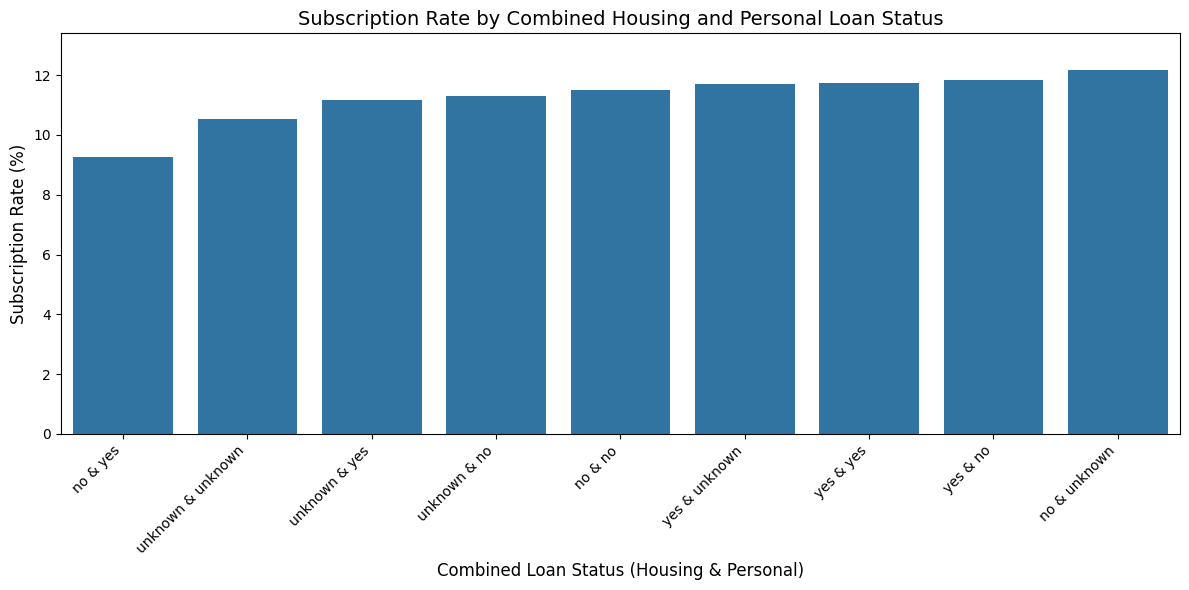

In [27]:
df_cleaned['Combined Loan Status'] = df_cleaned['Housing Loan'] + ' & ' + df_cleaned['Personal Loan']
feature_col_cl = 'Combined Loan Status'
print(f"4. {feature_col_cl} (Housing & Personal) vs {target_col} Analysis")


combined_loan_analysis = df_cleaned.groupby([feature_col_cl, target_col]).size().unstack(fill_value=0)
combined_loan_analysis['Total'] = combined_loan_analysis.sum(axis=1)
if 'yes' in combined_loan_analysis.columns:
    combined_loan_analysis['Subscription Rate (%)'] = (combined_loan_analysis['yes'] / combined_loan_analysis['Total']) * 100
else:
    combined_loan_analysis['Subscription Rate (%)'] = 0
combined_loan_analysis = combined_loan_analysis.sort_values(by='Subscription Rate (%)')
print(combined_loan_analysis)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_loan_analysis.index, y='Subscription Rate (%)', data=combined_loan_analysis)
plt.title(f'Subscription Rate by Combined Housing and Personal Loan Status', fontsize=14)
plt.xlabel(f'{feature_col_cl} (Housing & Personal)', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, combined_loan_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('combined_loan_subscription_rate.png')
plt.show()

Observations:

Even though there are many users whose credit default, housing loan and/or personal loan are unknown, they will still be used in the analysis as they contain data in other columns.

For credit default and loans:
- People with No Personal Loans are MORE LIKELY to subscribe compared to those who have
- People with No Housing Loans are LESS LIKELY to subscribe compared to those who have
- People with No Credit Default are ALMOST CERTAIN to subscribe compareed to those who have

As only 3 users have credit default and none of them are subscribed compared to 10.25% of users with no crdit default, credit default is an essential indicator to whether a user is more likely to subscribe.

For the combined housing and personal loan, excluding the combinations with unknowns (provides no information on the client), there is a higher percentage for those with housing loan and no personal loan followed by those with no housing and personal loan


**Subscription status distribution**

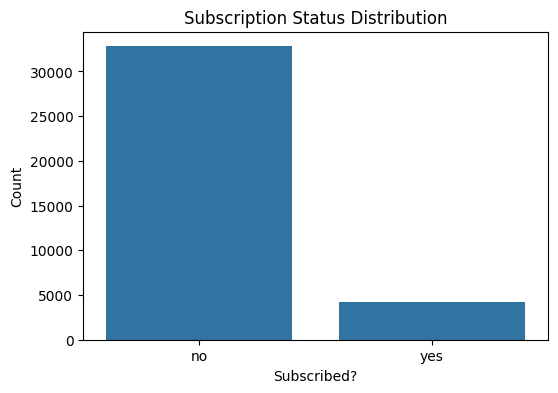

(np.float64(11.329782920169771), np.float64(88.67021707983022))

In [28]:
sub_counts = df_cleaned['Subscription Status'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Subscription Status')
plt.title("Subscription Status Distribution")
plt.xlabel("Subscribed?")
plt.ylabel("Count")
plt.show()

# Percentage calculation
yes_rate = (sub_counts.get('yes', 0) / df_cleaned.shape[0]) * 100
no_rate = (sub_counts.get('no', 0) / df_cleaned.shape[0]) * 100

yes_rate, no_rate

Most clients did not subscribe to the term deposit.

Only a small portion of clients said “yes”, making this a highly imbalanced dataset.

**Age Distribution**

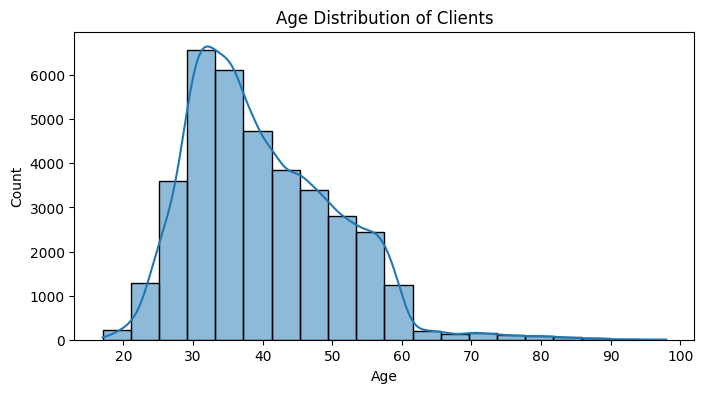

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Comparing Age vs Subscription Status**

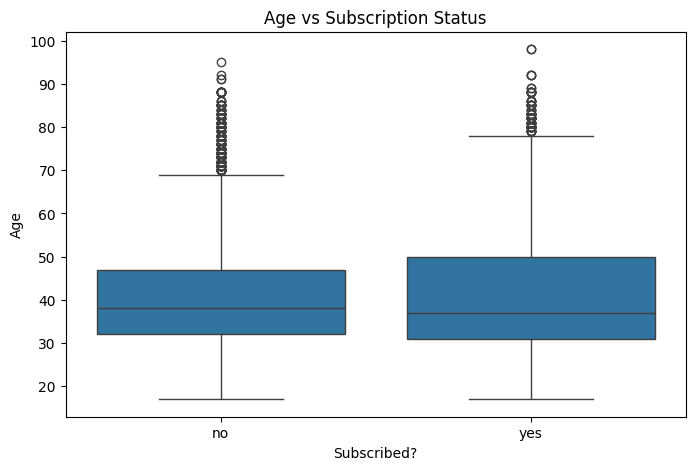

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned, x='Subscription Status', y='Age')
plt.title("Age vs Subscription Status")
plt.xlabel("Subscribed?")
plt.ylabel("Age")
plt.show()


The boxplot shows that the age distribution between customers who subscribed (“yes”) and those who did not (“no”) is very similar. Both groups have a median age around the late 30s. While there are older clients (shown as outliers), the overall spread of ages does not differ significantly between the two groups. This suggests that age alone is not a strong predictor of subscription.

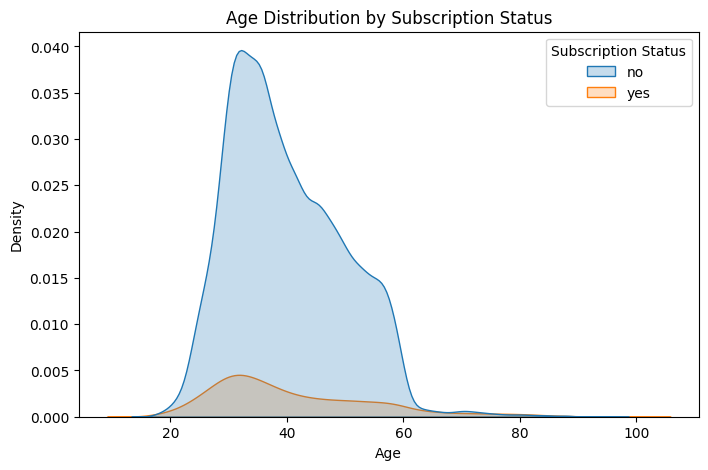

In [31]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_cleaned, x='Age', hue='Subscription Status', fill=True)
plt.title("Age Distribution by Subscription Status")
plt.show()


The density plot shows that the age distributions for subscribers and non-subscribers are highly similar. Most clients fall between 25–60 years old, and both groups share the same general shape. This suggests that age is not a strong distinguishing factor in determining whether a client will subscribe. The dataset also contains very few clients above age 60.

**Comparing Age Group vs Subscription Status**

As individual ages data and analysis is very scarce, attempting to look at it in age groups would help to understand the data further

In [32]:
# compute subscription rate (%) by age group
age_group_rates = (
    df_cleaned
      .groupby('Age Group')['Subscription Status']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)['yes'] * 100
)

age_group_rates


C:\Users\jltho\AppData\Local\Temp\ipykernel_2920\3875872149.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age Group')['Subscription Status']


Age Group
1–25     24.016563
26–35    12.253705
36–45     8.730420
46–55     8.600770
56–65    13.563004
66+      47.920133
Name: yes, dtype: float64

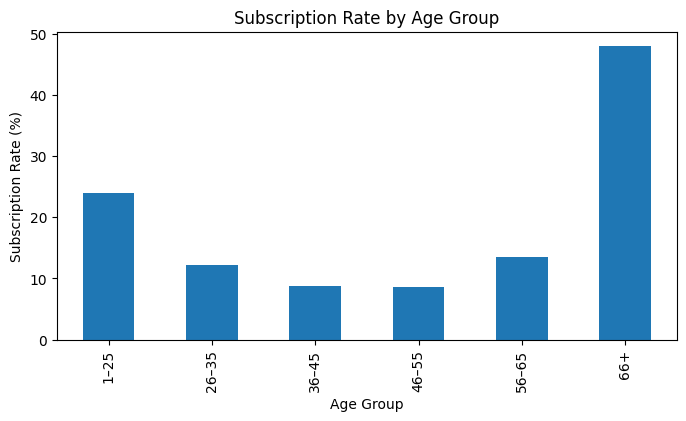

In [33]:
plt.figure(figsize=(8,4))
age_group_rates.plot(kind='bar')
plt.title("Subscription Rate by Age Group")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Age Group")
plt.show()


The clients most likely to subscribe are older adults (66+) and young adults (18–25), while middle-aged groups show significantly lower subscription rates, likely due to different financial priorities. This highlights clear age-based segmentation opportunities for future marketing strategies.

**Occupations Distribution**

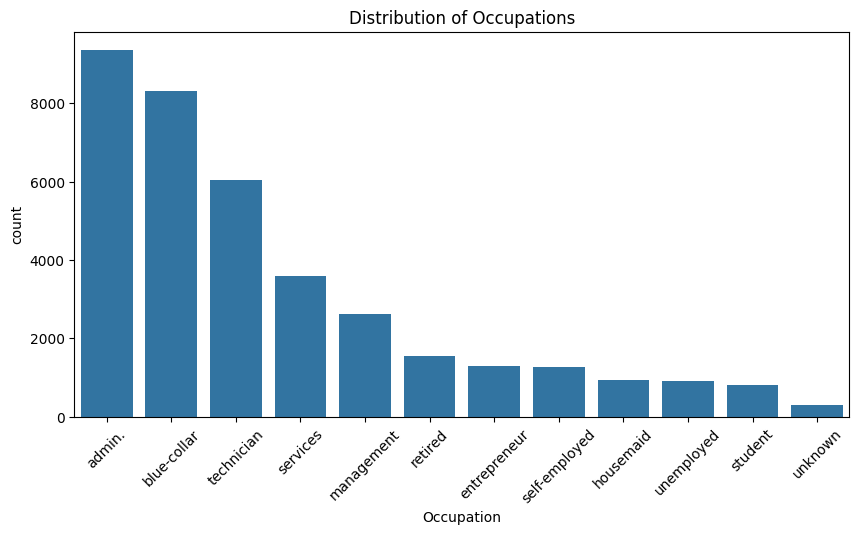

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='Occupation', order=df_cleaned['Occupation'].value_counts().index)
plt.title("Distribution of Occupations")
plt.xticks(rotation=45)
plt.show()


**Subscription Rates vs Occupation**

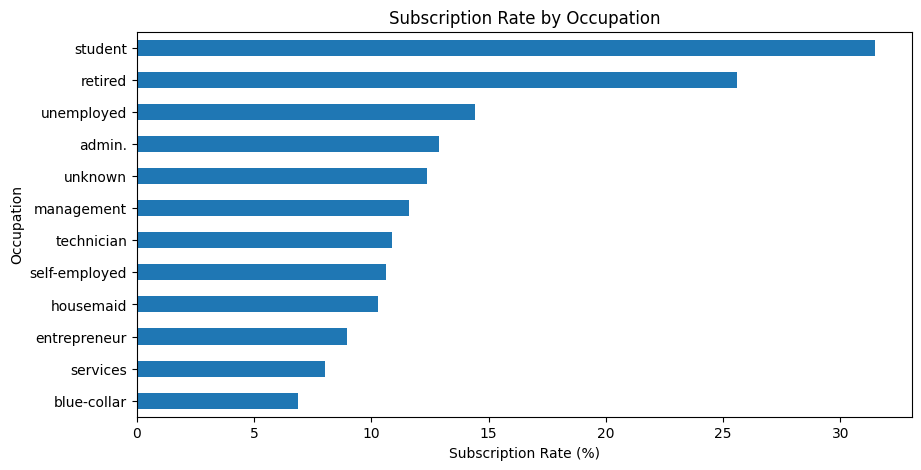

In [35]:
occupation_rates = (
    df_cleaned.groupby('Occupation')['Subscription Status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
)

plt.figure(figsize=(10,5))
occupation_rates.sort_values().plot(kind='barh')
plt.title("Subscription Rate by Occupation")
plt.xlabel("Subscription Rate (%)")
plt.show()


Occupation has a clear impact on subscription behaviour. Students and retired clients show the highest subscription rates, making them strong target segments for term deposit campaigns. Middle-income groups such as admin, management, and technical roles show moderate response, while blue-collar and service-oriented occupations have the lowest subscription rates. This indicates that job stability, financial flexibility, and life stage significantly influence the likelihood of subscribing.

**Distribution of Marital Status**

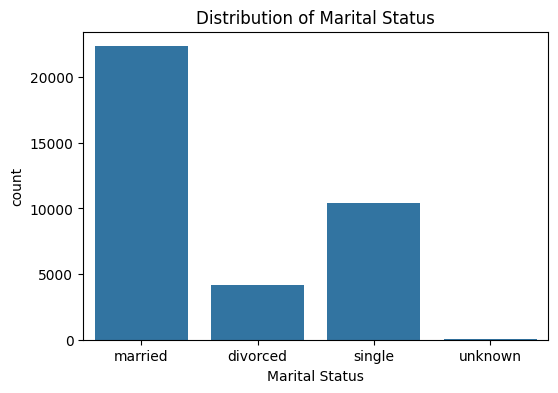

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Marital Status')
plt.title("Distribution of Marital Status")
plt.show()


**Subscription Rate vs Marital Status**

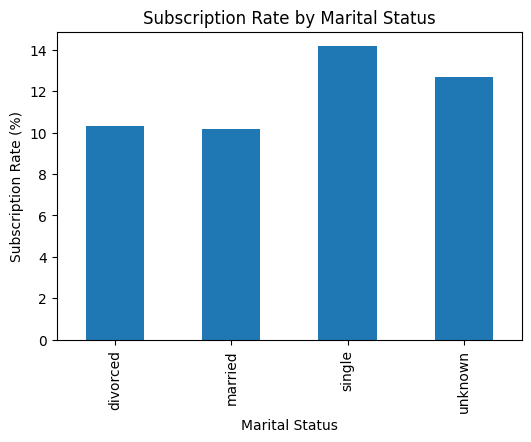

In [37]:
marital_rates = (
    df_cleaned.groupby('Marital Status')['Subscription Status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
)

plt.figure(figsize=(6,4))
marital_rates.plot(kind='bar')
plt.title("Subscription Rate by Marital Status")
plt.ylabel("Subscription Rate (%)")
plt.show()


Marital status influences subscription behaviour. Single clients have the highest subscription rate, suggesting they are more receptive to term deposit offers. Married and divorced clients subscribe at similar moderate levels, likely due to greater financial commitments.

Interestingly, the “unknown” category also performs well, implying that missing marital data may correspond to younger or more financially active customers. Overall, marital status provides useful segmentation insights for targeted marketing.

**Education Levels Distribution**

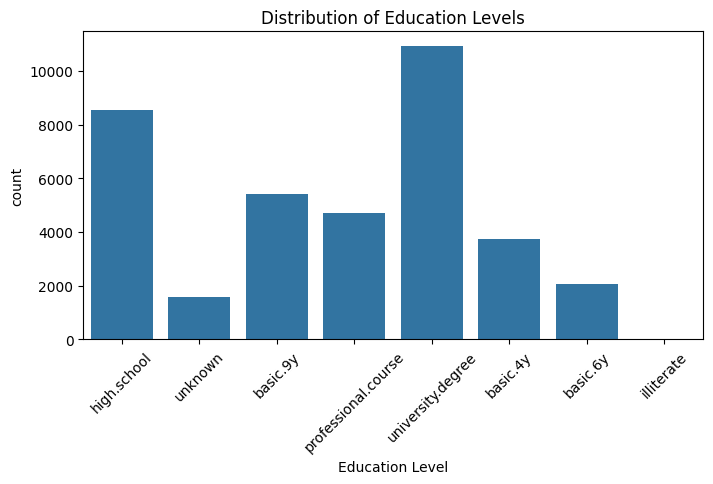

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_cleaned, x='Education Level')
plt.title("Distribution of Education Levels")
plt.xticks(rotation=45)
plt.show()


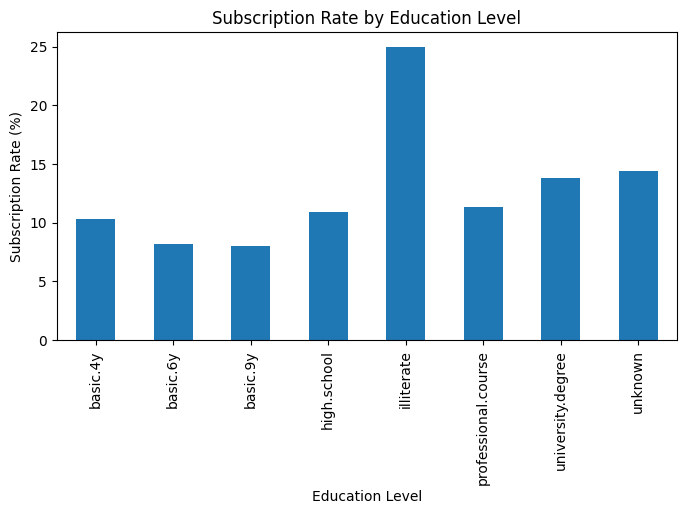

In [ ]:
edu_rates = (
    df_cleaned.groupby('Education Level')['Subscription Status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
)

plt.figure(figsize=(8,4))
edu_rates.plot(kind='bar')
plt.title("Subscription Rate by Education Level")
plt.ylabel("Subscription Rate (%)")
plt.show()


Education level shows clear patterns in subscription behaviour. Clients with the highest education levels (university degree) tend to have higher subscription rates, likely due to greater financial literacy and income stability.

Surprisingly, the “illiterate” group has an extremely high subscription rate, but this is likely influenced by small sample size and should be interpreted with caution. Basic education groups consistently show the lowest subscription rates, indicating that financial understanding may influence willingness to invest in term deposits. Overall, education is a meaningful predictor of subscription behaviour.

Contact with Clients

Contact Method vs Subscription Status Analysis 
Subscription Status     no   yes  Total  Subscription Rate (%)
Contact Method                                                
cellular             20017  3479  23496              14.806776
telephone            12783   712  13495               5.276028


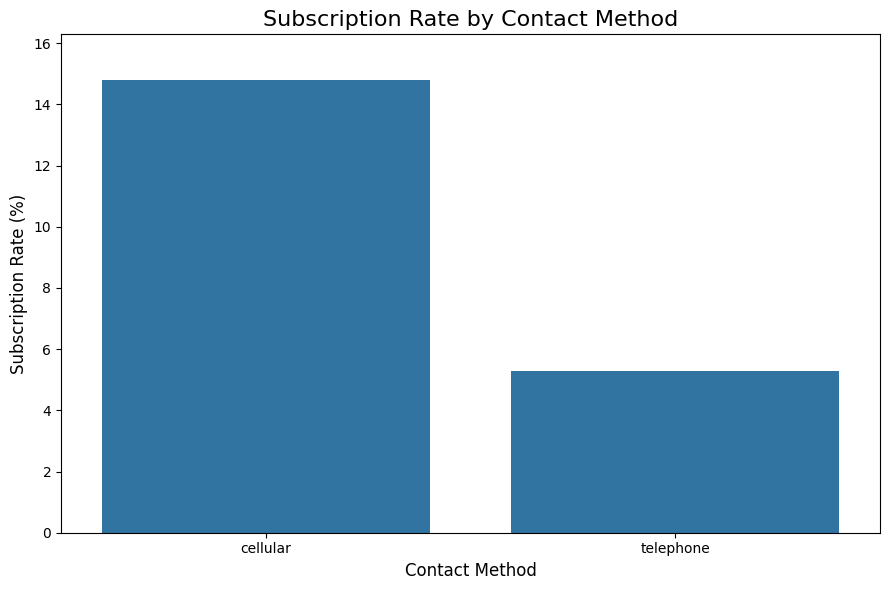

In [ ]:
feature_col_cm = 'Contact Method'
print(f"{feature_col_cm} vs {target_col} Analysis ")

#Calculation
contact_analysis = df_cleaned.groupby([feature_col_cm, target_col]).size().unstack(fill_value=0)
contact_analysis['Total'] = contact_analysis['no'] + contact_analysis['yes']
if 'yes' in contact_analysis.columns:
    contact_analysis['Subscription Rate (%)'] = (contact_analysis['yes'] / contact_analysis['Total']) * 100
else:
    contact_analysis['Subscription Rate (%)'] = 0
contact_analysis = contact_analysis.sort_values(by='Subscription Rate (%)', ascending=False)
print(contact_analysis)

#Plotting
plt.figure(figsize=(9, 6))
sns.barplot(x=contact_analysis.index, y='Subscription Rate (%)', data=contact_analysis)
plt.title(f'Subscription Rate by {feature_col_cm}', fontsize=16)
plt.xlabel(f'{feature_col_cm}', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, contact_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('contact_method_subscription_rate.png')
plt.show()

The success rate for contacting clients via cellular phone is nearly three times higher (14.8%) than via telephone (5.23%).

Recommendation: Prioritize campaign resources, time, and budget towards clients for whom a cellular number is available.

 Campaign Calls (Campaign Bins) vs Subscription Status Analysis
Subscription Status     no   yes  Total  Subscription Rate (%)
Campaign Bins                                                 
1                    13735  2064  15799              13.064118
2                     8425  1107   9532              11.613512
3                     4265   514   4779              10.755388
4                     2181   223   2404               9.276206
5                     1316   110   1426               7.713885
6-10                  2114   148   2262               6.542882
11+                    764    25    789               3.168568


C:\Users\jltho\AppData\Local\Temp\ipykernel_2920\907719962.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_analysis = df_cleaned.groupby([feature_col_cc, target_col]).size().unstack(fill_value=0)


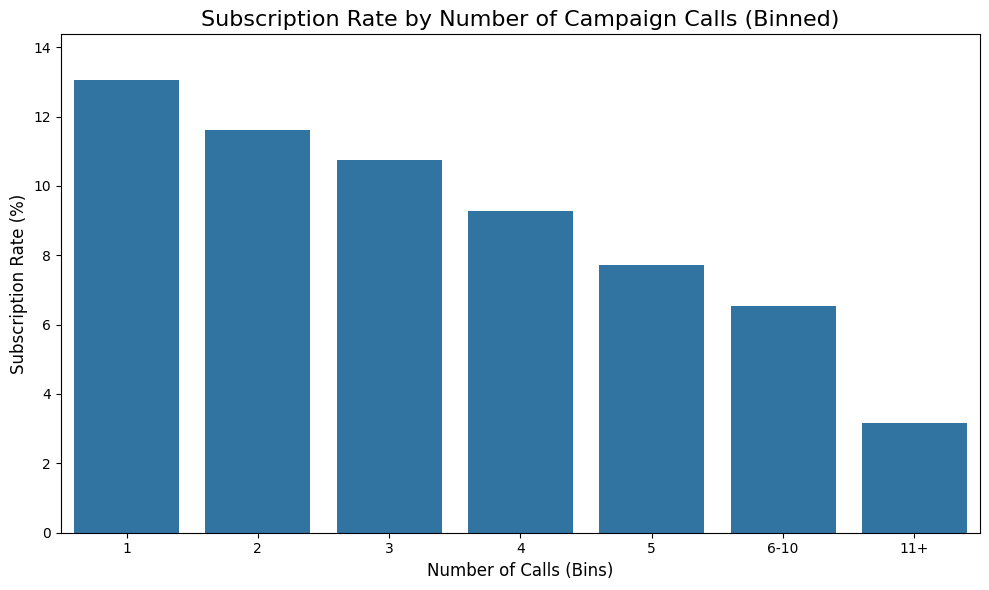

In [ ]:
# Campaign Calls
#Bins and labels to store the thresholds to use
bins = [0, 1, 2, 3, 4, 5, 10, 60]
labels = ['1', '2', '3', '4', '5', '6-10', '11+']

df_cleaned['Campaign Bins'] = pd.cut(
    df_cleaned['Campaign Calls'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Campaign Calls EDA
feature_col_cc = 'Campaign Bins'
print(f" Campaign Calls ({feature_col_cc}) vs {target_col} Analysis")

# Calculation
campaign_analysis = df_cleaned.groupby([feature_col_cc, target_col]).size().unstack(fill_value=0)
campaign_analysis['Total'] = campaign_analysis['no'] + campaign_analysis['yes']
if 'yes' in campaign_analysis.columns:
    campaign_analysis['Subscription Rate (%)'] = (campaign_analysis['yes'] / campaign_analysis['Total']) * 100
else:
    campaign_analysis['Subscription Rate (%)'] = 0
campaign_analysis = campaign_analysis.sort_values(by='Subscription Rate (%)', ascending=False)
print(campaign_analysis)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_analysis.index, y='Subscription Rate (%)', data=campaign_analysis)
plt.title('Subscription Rate by Number of Campaign Calls (Binned)', fontsize=16)
plt.xlabel('Number of Calls (Bins)', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, campaign_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('campaign_calls_subscription_rate.png')
plt.show()

The highest subscription rate comes from clients who were contacted only once (13%). The rate steadily decreases with each additional call. With 5 or more calls, the subscription rate drops significantly below 7%. Calls exceeding 10 are largely inefficient, resulting in a rate of just 3%.

Previous Contact Status (Was Previously Contacted) vs Subscription Status Analysis
Subscription Status          no   yes  Total  Subscription Rate (%)
Was Previously Contacted                                           
Contacted                   501   872   1373              63.510561
Not Contacted             32299  3319  35618               9.318322


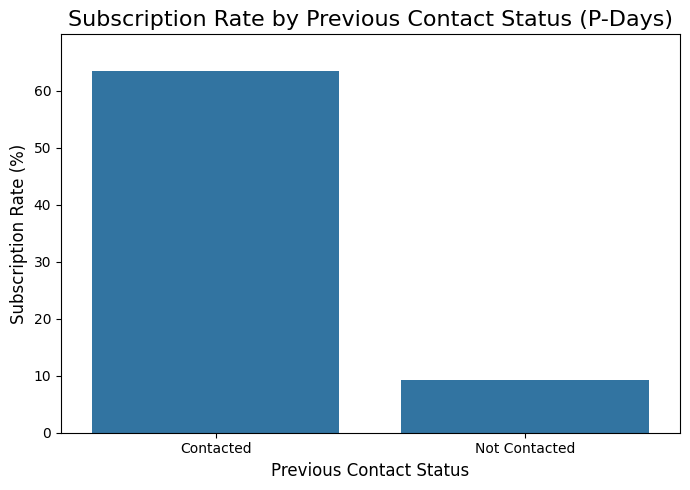


 Additional Insight: P-Days for Contacted Clients (Mean)
Subscription Status
no     6.083832
yes    5.891055
Name: Previous Contact Days, dtype: float64


In [ ]:
#Previous Contact Days

# Indicate '999' means client was not contacted
df_cleaned['Was Previously Contacted'] = df_cleaned['Previous Contact Days'].apply(
    lambda x: 'Not Contacted' if x == 999 else 'Contacted'
)

# Previous Contact Days Category EDA
feature_col_pd = 'Was Previously Contacted'
print(f"Previous Contact Status ({feature_col_pd}) vs {target_col} Analysis")

# Calculation
pdays_category_analysis = df_cleaned.groupby([feature_col_pd, target_col]).size().unstack(fill_value=0)
pdays_category_analysis['Total'] = pdays_category_analysis['no'] + pdays_category_analysis['yes']
if 'yes' in pdays_category_analysis.columns:
    pdays_category_analysis['Subscription Rate (%)'] = (pdays_category_analysis['yes'] / pdays_category_analysis['Total']) * 100
else:
    pdays_category_analysis['Subscription Rate (%)'] = 0
pdays_category_analysis = pdays_category_analysis.sort_values(by='Subscription Rate (%)', ascending=False)
print(pdays_category_analysis)

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x=pdays_category_analysis.index, y='Subscription Rate (%)', data=pdays_category_analysis)
plt.title('Subscription Rate by Previous Contact Status (P-Days)', fontsize=16)
plt.xlabel('Previous Contact Status', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.ylim(0, pdays_category_analysis['Subscription Rate (%)'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('pdays_category_subscription_rate.png')
plt.show()


# Previous Contact Days for Contacted Clients (Mean)
print("\n Additional Insight: P-Days for Contacted Clients (Mean)")
contacted_df = df_cleaned[df_cleaned['Was Previously Contacted'] == 'Contacted']
pdays_insight = contacted_df.groupby('Subscription Status')['Previous Contact Days'].mean()
print(pdays_insight)

Clients who were successfully contacted in a previous campaign (clients with 999 value) have an overwhelmingly high subscription rate of 63.83%. This indicates that clients who engaged previously are highly receptive.

Average P-Days for Contacted Clients:Subscribed ('yes'): 5.9 days since last contact.Not Subscribed ('no'): 6.1 days since last contact. The difference is negligible, suggesting previous contact with the client matters more than how long ago that contact was (at least within the 6-day average window).